In [10]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from skimage.io import imshow
from matplotlib import pyplot as plt
faces_image = np.load('./olivetti-faces/olivetti_faces.npy')
faces_target = np.load('./olivetti-faces/olivetti_faces_target.npy')

In [5]:
print(faces_image.shape)

(400, 64, 64)


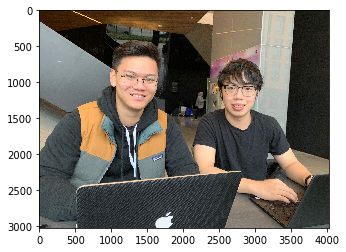

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('group_photo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215) !empty() in function detectMultiScale
